# Spatial Analysis

### MAPPING TIZI OUZOU

+ **library and Data**

In [32]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
from shapely.geometry import Polygon, Point
from matplotlib.patches import RegularPolygon 

In [33]:
full_data=gpd.read_file("C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/algeria census/data/algeria_administrative_level_data/dza_admbnda_adm1_unhcr_20200120.shp")

 + **Dataframe dimensions**

In [34]:
full_data.shape

(48, 17)

+ **Columns names and informations**

In [35]:
full_data.columns

Index(['Shape_Leng', 'Shape_Area', 'ADM1_EN', 'ADM1_AR', 'ADM1_PCODE',
       'ADM1_REF', 'ADM1ALT1EN', 'ADM1ALT2EN', 'ADM1ALT1AR', 'ADM1ALT2AR',
       'ADM0_EN', 'ADM0_AR', 'ADM0_PCODE', 'date', 'validOn', 'validTo',
       'geometry'],
      dtype='object')

In [36]:
full_data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Shape_Leng  48 non-null     float64 
 1   Shape_Area  48 non-null     float64 
 2   ADM1_EN     48 non-null     object  
 3   ADM1_AR     48 non-null     object  
 4   ADM1_PCODE  48 non-null     object  
 5   ADM1_REF    1 non-null      object  
 6   ADM1ALT1EN  0 non-null      object  
 7   ADM1ALT2EN  0 non-null      object  
 8   ADM1ALT1AR  0 non-null      object  
 9   ADM1ALT2AR  0 non-null      object  
 10  ADM0_EN     48 non-null     object  
 11  ADM0_AR     48 non-null     object  
 12  ADM0_PCODE  48 non-null     object  
 13  date        48 non-null     object  
 14  validOn     48 non-null     object  
 15  validTo     0 non-null      object  
 16  geometry    48 non-null     geometry
dtypes: float64(2), geometry(1), object(14)
memory usage: 6.5+ KB


+ **Description**

In [51]:
data=full_data[['ADM1_EN','geometry']]
data_fruital=data.set_index("ADM1_EN")
data_fruital.head()

,geometry
ADM1_EN,
Adrar,"POLYGON ((1.98461 30.38300, 1.94541 30.24073, ..."
Ain-Defla,"POLYGON ((1.65479 36.45092, 1.65478 36.44934, ..."
Ain-Temouchent,"MULTIPOLYGON (((-1.48057 35.29882, -1.48052 35..."
Alger,"MULTIPOLYGON (((3.06823 36.77358, 3.06708 36.7..."
Annaba,"MULTIPOLYGON (((7.70981 36.95002, 7.70932 36.9..."


In [52]:
data_fruital=data_fruital.loc[fruital]

**check if the territory of eccbc is well write** 

In [53]:
fruital=["Alger",'Tizi Ouzou','Boumerdes','Blida','Medea','Tipaza','Bouira',"Bordj Bou Arrer",'Ain-Defla','Djelfa','Ghardaia','Laghouat','Tamanrasset',"M'Sila",'Chlef','Ouargla']

In [54]:
data.head()

,ADM1_EN,geometry
0,Adrar,"POLYGON ((1.98461 30.38300, 1.94541 30.24073, ..."
1,Ain-Defla,"POLYGON ((1.65479 36.45092, 1.65478 36.44934, ..."
2,Ain-Temouchent,"MULTIPOLYGON (((-1.48057 35.29882, -1.48052 35..."
3,Alger,"MULTIPOLYGON (((3.06823 36.77358, 3.06708 36.7..."
4,Annaba,"MULTIPOLYGON (((7.70981 36.95002, 7.70932 36.9..."


In [55]:
fruital=["Alger",'Tizi Ouzou','Boumerdes','Blida','Medea','Tipaza','Bouira',"Bordj Bou Arrer",'Ain-Defla','Djelfa','Ghardaia','Laghouat','Tamanrasset',"M'Sila",'Chlef','Ouargla']

In [56]:
data_fruital.replace("Bordj Bou Arrer","BBA",inplace=True)
data_fruital.replace("Tizi Ouzou","Tizi",inplace=True)

In [57]:
data_fruital=data_fruital.reset_index()

*Algeria with fruital territory*

[Text(0.5, 1.0, "ECCBC Algeria' s territories")]

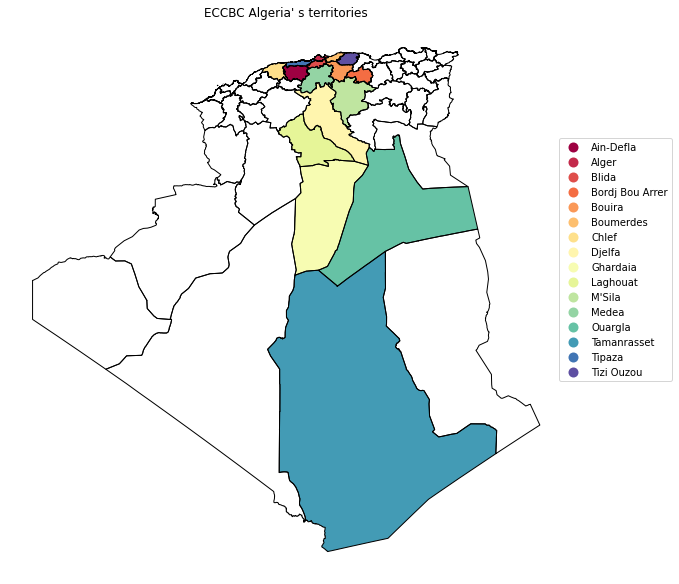

In [58]:
import matplotlib.pyplot  as plt
fig, ax = plt.subplots(figsize=(10, 25))
c=data_fruital.plot(column='ADM1_EN',
                legend=True,
                ax=ax,cmap=plt.cm.Spectral)
leg = ax.get_legend()
leg.set_bbox_to_anchor((1.2,0.8))
ax.set_axis_off()
data.geometry.boundary.plot(color=None,edgecolor='k',linewidth = 1,ax=ax) 
ax.set(title="ECCBC Algeria' s territories")

<ipython-input-59-c9167522f737>:9: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s=row['ADM1_EN'], xy=row['coords'],


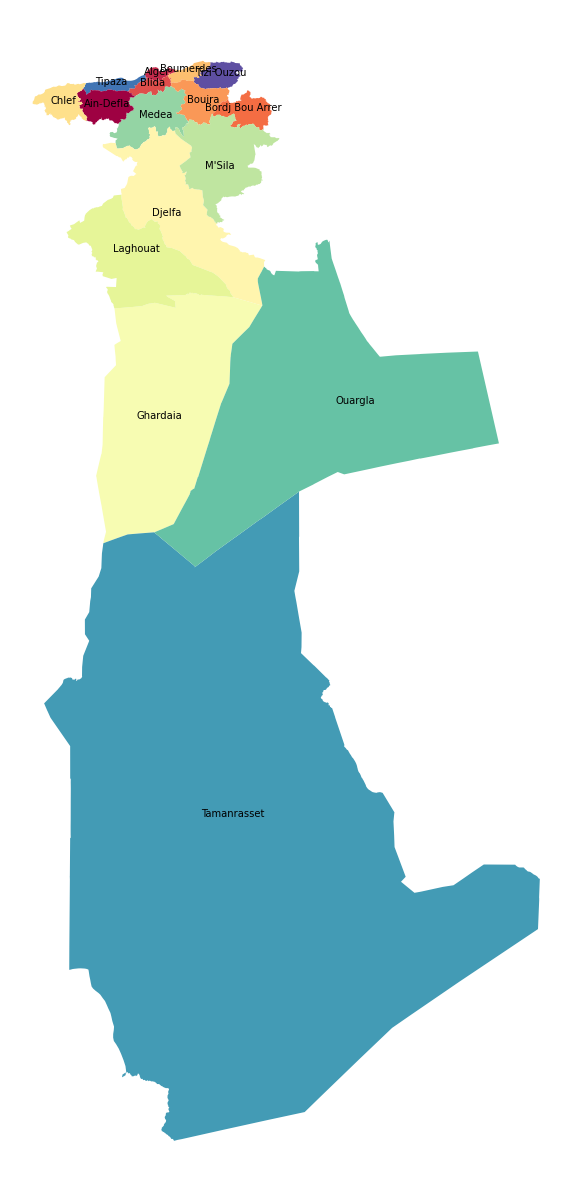

In [59]:
import matplotlib.pyplot  as plt
fig, ax = plt.subplots(figsize=(10, 25))
c=data_fruital.plot(column='ADM1_EN', ax=ax,cmap=plt.cm.Spectral)
ax.set_axis_off()

data_fruital['coords'] = data_fruital['geometry'].apply(lambda x: x.representative_point().coords[:])
data_fruital['coords'] = [coords[0] for coords in data_fruital['coords']]
for idx, row in data_fruital.iterrows():
    plt.annotate(s=row['ADM1_EN'], xy=row['coords'],
                 horizontalalignment='center')


In [60]:
full_data2=gpd.read_file("C:/Users/Salif SAWADOGO/OneDrive - EQUATORIAL COCA-COLA BOTTLING COMPANY S.L/dynamic segmentation/algeria census/data/algeria_administrative_level_data/dza_admbnda_adm2_unhcr_20200120.shp")

In [61]:
full_data2.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

C:\Users\Salif SAWADOGO\Anaconda3\envs\PREMIER\lib\site-packages\geopandas\plotting.py:641: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


[Text(0.5, 1.0, 'Tizi Ouzou Wilaya, Area: 4 605 Km$^2$')]

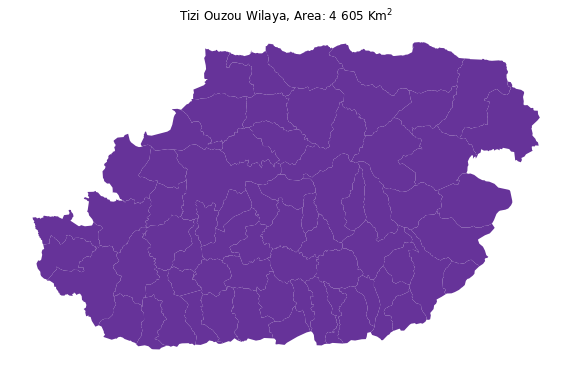

In [62]:
full_data2=full_data2.loc[full_data2['ADM1_EN']=='Tizi Ouzou']
fig, ax = plt.subplots(figsize=(10, 10))
c=full_data2.plot(color='rebeccapurple',column='ADM1_EN', ax=ax)
ax.set_axis_off()
ax.set(title='Tizi Ouzou Wilaya, Area: 4 605 Km$^2$')

In [63]:
data_fruital.loc[data_fruital['ADM1_EN']=='Tizi'].area/10**6

<ipython-input-63-fd0d76b51b3b>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data_fruital.loc[data_fruital['ADM1_EN']=='Tizi'].area/10**6


Series([], dtype: float64)

In [64]:
def form_hex_grid(territory, hex_diameter: int):
  """
    A function to form a hexagonal grid
    
    Arguments: 
    territory - GeoDataFrame for a territory
    hex_diameter - integer, diameter size to use in defining hexagon dimensions
 
    Returns: GeoDataFrame with geometry for hexagonal grid formed for a territory provided
  """ 
  
  # 1) Define general hex parameters
  xmin, ymin, xmax, ymax = [x * 1.01 for x in territory.total_bounds]
  EW = haversine_custom((xmin,ymin),(xmax,ymin))
  NS = haversine_custom((xmin,ymin),(xmin,ymax))
  
  # diamter of each hexagon in the grid
  d = hex_diameter
  
  # horizontal width of hexagon = w = d* sin(60)
  w = d*np.sin(np.pi/3)
  
  # Approximate number of hexagons per row = EW/w 
  n_cols = int(EW/w) + 1
  
  # Approximate number of hexagons per column = NS/d
  n_rows = int(NS/w) + 1
  
  # 2) Add hex params to territory
  
  # ax = territory[["geometry"]].boundary.plot(edgecolor='black', figsize=(30, 60))  #
  
  # width of hexagon
  w = (xmax-xmin)/n_cols 
  
  # diameter of hexagon
  d = w/np.sin(np.pi/3)
  
  array_of_hexes = []
  for rows in range(0,n_rows):
      hcoord = np.arange(xmin,xmax,w) + (rows%2)*w/2
      vcoord = [ymax- rows*d*0.75]*n_cols
      for x, y in zip(hcoord, vcoord):  #, colors):
          hexes = RegularPolygon((x, y), numVertices=6, radius=d/2, alpha=0.2, edgecolor='k')
          verts = hexes.get_path().vertices
          trans = hexes.get_patch_transform()
          points = trans.transform(verts)
          array_of_hexes.append(Polygon(points))
          # ax.add_patch(hexes)  #
 
  # ax.set_xlim([xmin, xmax])  #
  # ax.set_ylim([ymin, ymax])  #
  # plt.show()  #
  
  # 3) Form hex grid as gpd
  hex_grid = gpd.GeoDataFrame({'geometry': array_of_hexes}, crs="EPSG:4326")
  hex_grid = hex_grid.to_crs(epsg=4326)
  
  return hex_grid

In [65]:
def haversine_custom(coord1, coord2):
  """
      A function to determine the great-circle distance between 2 points on Earth given their longitudes and latitudes
 
      Arguments: 
      coord1 - territory bounds for first point, lon & lat
      coord2 - territory bounds for second point, lon & lat
 
      Returns: Distance in meters
  """ 
  
  # Coordinates in decimal degrees (e.g. 43.60, -79.49)
  lon1, lat1 = coord1
  lon2, lat2 = coord2
 
  # Radius of Earth in meters
  R = 6371000  
 
  phi_1 = np.radians(lat1)
  phi_2 = np.radians(lat2)
  delta_phi = np.radians(lat2 - lat1)
  delta_lambda = np.radians(lon2 - lon1)
 
  a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi_1) * np.cos(phi_2) * np.sin(delta_lambda / 2.0) ** 2
  c = 2 * np.arctan2(np.sqrt(a),np.sqrt(1 - a))
 
  # Output distance in meters
  meters = R * c  
 
  # Output distance in kilometers
  km = meters / 1000.0  
  meters = round(meters)
  km = round(km, 3)
 
  #print(f"Distance: {meters} m")
  #print(f"Distance: {km} km")
 
  return meters

In [66]:
def hexalize_territory(territory, hex_grid):
  """
    A function to add hexagonal grid geometry to GeoDataFrame territory 
    
    Arguments: 
    territory - GeoDataFrame for a territory
    hex_grid - GeoDataFrame, hexagonal grid geometry as prepared for specified territory
 
    Returns: GeoDataFrame of a territory overlayed with a hexagonal grid
  """ 
  
  territory_hex = gpd.overlay(hex_grid, territory)
  territory_hex = gpd.GeoDataFrame(territory_hex, geometry='geometry', crs="EPSG:4326")
  territory_hex = territory_hex.reset_index()
  territory_hex.rename(columns={'index': 'hex_id'}, inplace=True)
  
  return territory_hex


<AxesSubplot:>

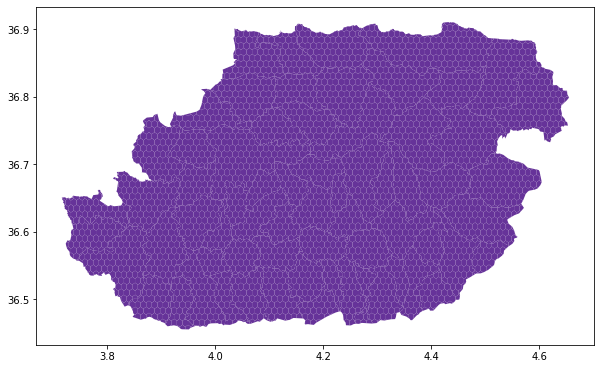

In [160]:
data3 = form_hex_grid(data, hex_diameter=1250)
sub_set = gpd.overlay(full_data2, data3,  how="intersection")
sub_set.plot(alpha=1, color='rebeccapurple',figsize=(10, 10))

In [ ]:
data4 = form_hex_grid(data, hex_diameter=2500)
sub_set = gpd.overlay(full_data2, data4,  how="intersection")
sub_set.plot(alpha=1, color='rebeccapurple',figsize=(10, 10))

In [ ]:
#data3.to_file("hex_set_1250", driver='GeoJSON')

In [170]:
#data4.to_file("hex_set_2500", driver='GeoJSON')